# Lab session 1 (with correction) : An introduction to textual data 

## Course takeaways

- The Why of NLP
- What is NLP ? the four challenges of NLP
- NLP in two pipelines

## Lab session Prerequisites

- Python 
- Pandas 

For those not familiar with pandas https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html 

## Lab session in a nushell 

- First step with a textual dataset 
- Basic Tokenization (Word Segmentation) of a dataset 
- Compute Vocabulary and Zipf's law
- Regex 
- Hands on some processing tools (POS, NER, parsing) 
- Topic models 

## Resources : 

- NLTK : https://www.nltk.org/api/nltk.tokenize.html 
- PANDAS : https://pandas.pydata.org/pandas-docs/stable/getting_started/10min.html
- SPACY : https://spacy.io/usage/spacy-101 

## Database : 

We will use the following database:
https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/01/PLOS_narrativity.csv.zip

This database is used in a scientific article about the importance of narrativity in the citation frequency of climate change scientific articles.  https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0167983  


## Tasks

### 1. Basic preprocessing
#### 1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters? 
#### 1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 

### 2. Word-level preprocessing
#### 2.1 Split the abstracts into list of words. How many different words are there in the vocabulary? 
#### 2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?
#### 2.3 Check if Zipf's law applies. 

### 3. Domain specificity and regex
#### 3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) using a regex. 
#### 3.2 How many percent of characters are numbers (as defined above) in a given abstract? 
#### 3.3 Is there any relationship between the percentage of numbers in an abstract and the amount of citation?  

### 4. Classic NLP pipeline
#### 4.0 Re-tokenize using spacy
#### 4.1 Lemmatize using spacy
#### 4.2 POS tagging using spacy, plot the trees
#### 4.3 NER using spacy, give the amount of each entity type for a given abstract, and compare it to the amount of citations. 

### 5. Topic Modelling
#### 5.1 Use Gensim's LDA to compute a topic model. 
#### 5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [0]:
# Downloading the database
!wget https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/01/PLOS_narrativity.csv.zip

--2020-02-08 16:25:57--  https://d1p17r2m4rzlbo.cloudfront.net/wp-content/uploads/2017/01/PLOS_narrativity.csv.zip
Resolving d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)... 13.35.163.73, 13.35.163.54, 13.35.163.59, ...
Connecting to d1p17r2m4rzlbo.cloudfront.net (d1p17r2m4rzlbo.cloudfront.net)|13.35.163.73|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 943863 (922K) [application/zip]
Saving to: ‘PLOS_narrativity.csv.zip’

PLOS_narrativity.cs 100%[===================>] 921.74K   937KB/s    in 1.0s    

2020-02-08 16:25:59 (937 KB/s) - ‘PLOS_narrativity.csv.zip’ saved [943863/943863]



In [0]:
!unzip PLOS_narrativity.csv.zip

Archive:  PLOS_narrativity.csv.zip
  inflating: PLOS_narrativity.csv    
   creating: __MACOSX/
  inflating: __MACOSX/._PLOS_narrativity.csv  


# 1. Basic preprocessing






## 1.1 Open the database. Generate simple statistics about the abstracts. How many unique articles are there? What is the mean length of abstracts in characters?

In [0]:
import pandas as pd

In [0]:
df = pd.read_csv('PLOS_narrativity.csv', index_col=0)
print("Shape:  {0}".format(df.shape))
df.head()

Shape:  (5614, 47)


,X_unit_id,X_created_at,X_id,X_started_at,X_tainted,X_channel,X_trust,X_worker_id,X_country,X_region,X_city,X_ip,appeal_to_reader,conjunctions,connectivity,narrative_perspective,sensory_language,setting,ab,appeal_to_reader_gold,conjunctions_gold,connectivity_gold,narrative_perspective_gold,pmid,py,sensory_language_gold,setting_gold,so,tc,af,au,bp,di,ep,is,pd,pt,sn,ti,ut,vl,z9,cin_mas,firstauthor,numberauthors,pid_mas,title
1,886110198,2/19/2016 00:11:58,1898740971,2/19/2016 00:04:22,False,coinworker,1,36180653,USA,AZ,Phoenix,104.200.151.6,yes,1,2,no,1,yes,The ranges of plants and animals are moving in...,NaN,NaN,NaN,NaN,20033047,2009,NaN,NaN,Nature,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,Loarie,6.0,45914059.0,The velocity of climate change.
2,886110198,2/19/2016 00:21:48,1898749020,2/19/2016 00:15:03,False,coinworker,1,36180771,USA,WA,Seattle,104.200.154.54,no,0,1,yes,1,yes,The ranges of plants and animals are moving in...,NaN,NaN,NaN,NaN,20033047,2009,NaN,NaN,Nature,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,Loarie,6.0,45914059.0,The velocity of climate change.
3,886110198,2/19/2016 00:38:40,1898760130,2/19/2016 00:19:16,False,elite,1,36514787,AUS,02,Sydney,103.238.131.246,yes,2,2,no,1,yes,The ranges of plants and animals are moving in...,NaN,NaN,NaN,NaN,20033047,2009,NaN,NaN,Nature,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,Loarie,6.0,45914059.0,The velocity of climate change.
4,886110198,2/19/2016 01:08:54,1898775228,2/19/2016 01:04:05,False,neodev,1,33714737,USA,AZ,Tempe,23.235.227.109,no,2,4,no,2,yes,The ranges of plants and animals are moving in...,NaN,NaN,NaN,NaN,20033047,2009,NaN,NaN,Nature,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,Loarie,6.0,45914059.0,The velocity of climate change.
5,886110198,2/19/2016 01:25:11,1898784119,2/19/2016 01:22:23,False,instagc,1,30108041,USA,TX,Austin,173.174.53.56,no,4,1,no,2,no,The ranges of plants and animals are moving in...,NaN,NaN,NaN,NaN,20033047,2009,NaN,NaN,Nature,490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,37.0,Loarie,6.0,45914059.0,The velocity of climate change.


In [0]:
df.columns

Index(['X_unit_id', 'X_created_at', 'X_id', 'X_started_at', 'X_tainted',
       'X_channel', 'X_trust', 'X_worker_id', 'X_country', 'X_region',
       'X_city', 'X_ip', 'appeal_to_reader', 'conjunctions', 'connectivity',
       'narrative_perspective', 'sensory_language', 'setting', 'ab',
       'appeal_to_reader_gold', 'conjunctions_gold', 'connectivity_gold',
       'narrative_perspective_gold', 'pmid', 'py', 'sensory_language_gold',
       'setting_gold', 'so', 'tc', 'af', 'au', 'bp', 'di', 'ep', 'is', 'pd',
       'pt', 'sn', 'ti', 'ut', 'vl', 'z9', 'cin_mas', 'firstauthor',
       'numberauthors', 'pid_mas', 'title'],
      dtype='object')

In [0]:

# Number of different articles in the database
print(len(df.pmid.unique()))

802


In [0]:
# Mean length of abstracts in characters
df.ab.drop_duplicates().apply(len).mean()

1496.1795511221944

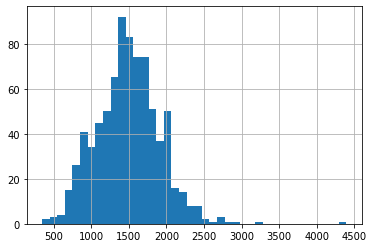

In [0]:
# Repartition of the abstracts length in characters
%matplotlib inline
df.ab.drop_duplicates().apply(len).hist(bins=40)

## 1.2 Generate simple statistics about the annotators' data for each article. Do the annotations seem consistent? 


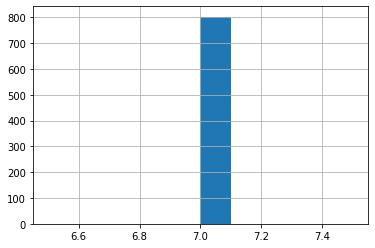

In [0]:
# First, number of annotator per article
df.drop_duplicates().groupby(df.pmid).size().hist()
# --> Always 7 annotators/article

In [0]:
# Seing coherence between annotators : need to transform appeal_to_reader, narrative_perspective, setting to bools. 
# Then, std on the columns. 

df['appeal_to_reader'] = df.appeal_to_reader.apply(lambda x: True if x=="yes" else False)
df['narrative_perspective'] = df.narrative_perspective.apply(lambda x: True if x=="yes" else False)
df['setting'] = df.setting.apply(lambda x: True if x=="yes" else False)

In [0]:
eval_cols = ["appeal_to_reader", "conjunctions", "connectivity", "narrative_perspective", "sensory_language", "setting"]
df.groupby(df.pmid)[eval_cols].std()

,appeal_to_reader,conjunctions,connectivity,narrative_perspective,sensory_language,setting
pmid,,,,,,
18726051,0.487950,1.976047,1.000000,0.487950,1.397276,0.000000
18783869,0.534522,1.573592,1.976047,0.377964,1.718249,0.534522
18810525,0.487950,1.345185,1.799471,0.487950,1.463850,0.000000
18810526,0.487950,2.214670,0.975900,0.377964,1.214986,0.000000
18811616,0.534522,1.069045,1.380131,0.377964,1.069045,0.487950
...,...,...,...,...,...,...
22216227,0.487950,1.133893,1.718249,0.534522,2.449490,0.377964
22216263,0.487950,0.951190,2.340126,0.487950,0.975900,0.487950
22216307,0.534522,1.133893,1.799471,0.487950,1.380131,0.377964


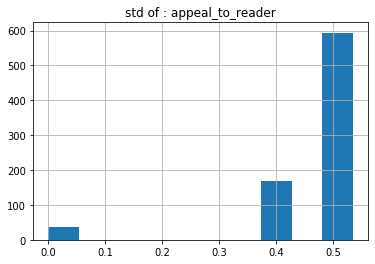

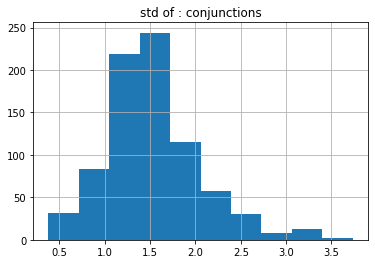

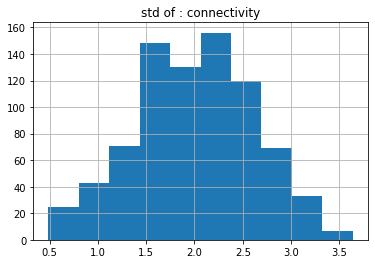

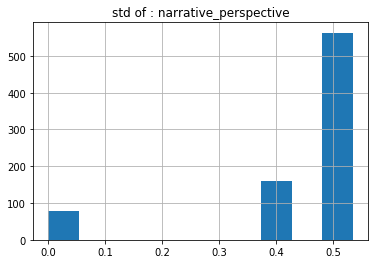

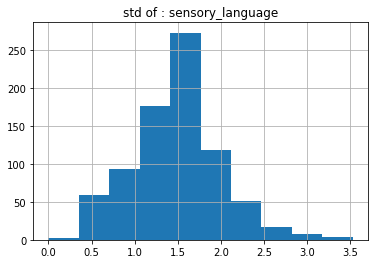

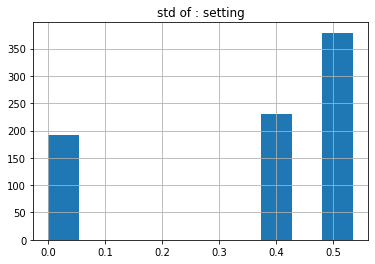

In [0]:
import matplotlib.pyplot as plt
for col in eval_cols:
  plt.figure()
  plt.title("std of : {0}".format(col))
  df.groupby(df.pmid)[col].std().hist()
  plt.plot()

# 2. Word-level preprocessing


## 2.1 Split the abstracts into list of words. How many different words are there in the vocabulary?



In [0]:
# List of words with separator = " "
 arr = df.ab.drop_duplicates().apply(lambda x: x.split(' ')).array

from functools import reduce
from operator import add

arr = reduce(add, arr) # Concatenates all lists contained in arr
# Equivalent to :
# arr2 = []
# for a in arr:
#   arr2 = arr2 + a
# arr = arr2
len(set(arr)) 
# the set object transforms a list to the set of unique elements in the list 

20757

## 2.2 Split the abstracts into list of words using three different tokenizers from nltk. What is the difference in terms of number of words? What do you think has changed?


In [0]:
from nltk.tokenize import TreebankWordTokenizer
from nltk.tokenize import ToktokTokenizer
from nltk.tokenize import TweetTokenizer

tokenizers = [TreebankWordTokenizer(), ToktokTokenizer(), TweetTokenizer()]

for tok in tokenizers:
  arr = df.ab.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = reduce(add, arr)
  # the set object transforms a list to the set of unique elements in the list :
  print("Vocabulary size: {0} with {1} tokenizer".format(len(set(arr)), tok))  

Vocabulary size: 16484 with <nltk.tokenize.treebank.TreebankWordTokenizer object at 0x7fb2995ae8d0> tokenizer
Vocabulary size: 16642 with <nltk.tokenize.toktok.ToktokTokenizer object at 0x7fb2995ae7b8> tokenizer
Vocabulary size: 14437 with <nltk.tokenize.casual.TweetTokenizer object at 0x7fb2995ae908> tokenizer


## 2.3 Check if Zipf's law applies.

Counter({'the': 8119, ',': 7718, 'of': 7095, 'and': 6182, 'in': 4404, 'to': 4171, ')': 2495, '(': 2490, 'a': 2447, 'that': 1928, 'for': 1523, 'is': 1356, 'climate': 1305, 'on': 1256, 'with': 1203, '.': 1155, 'by': 1150, 'are': 1087, 'from': 995, 'species': 977, 'change': 902, 'The': 806, 'as': 788, 'be': 674, 'we': 645, 'have': 642, 'We': 619, 'at': 594, 'was': 539, 'an': 528, 'temperature': 523, 'this': 508, 'changes': 506, 'were': 493, 'global': 458, 'between': 451, '%': 437, 'or': 416, 'these': 416, 'not': 408, 'carbon': 403, 'has': 402, 'may': 394, 'which': 381, 'but': 379, 'than': 369, '2': 363, ';': 350, 'effects': 348, 'will': 336, 'water': 335, 'during': 333, 'can': 327, 'future': 322, 'more': 321, 'In': 321, 'over': 318, 'their': 303, 'been': 302, ':': 302, 'warming': 301, 'results': 292, 'increased': 277, 'data': 274, 'C': 271, 'increase': 271, 'model': 269, 'This': 262, 'also': 254, 'emissions': 251, 'environmental': 250, 'years': 248, 'such': 247, 'most': 245, 'Here': 240, 

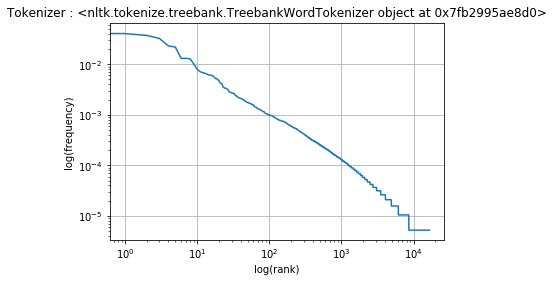

Counter({'the': 8119, ',': 7718, 'of': 7095, 'and': 6182, 'in': 4404, 'to': 4171, ')': 2495, 'a': 2443, 'that': 1928, '(': 1794, 'for': 1523, 'is': 1356, 'climate': 1305, 'on': 1256, 'with': 1203, '.': 1156, 'by': 1150, 'are': 1087, 'from': 995, 'species': 976, 'change': 902, 'The': 804, 'as': 788, 'be': 674, 'we': 645, 'have': 642, 'We': 619, 'at': 594, 'was': 539, 'an': 528, 'temperature': 523, 'this': 508, 'changes': 504, 'were': 493, 'global': 459, 'between': 451, '%': 437, 'or': 416, 'these': 416, 'carbon': 403, 'has': 402, 'may': 394, 'not': 392, "'": 389, 'which': 381, 'but': 379, 'than': 369, '2': 365, ';': 350, 'effects': 348, 'will': 336, 'during': 333, 'water': 333, 'future': 322, 'more': 321, 'In': 321, 'over': 318, 'can': 311, 'their': 303, 'been': 302, ':': 301, 'warming': 297, 'C': 292, 'results': 292, 'increased': 277, 'data': 273, 'increase': 271, 'model': 268, 'This': 261, 'also': 254, 'emissions': 251, 'environmental': 250, 'years': 248, 'such': 247, 'most': 245, 'He

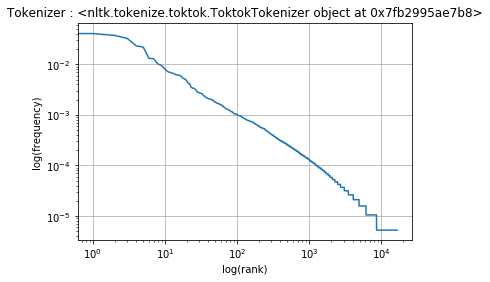

Counter({'the': 8116, ',': 7732, '.': 7223, 'of': 7098, 'and': 6208, 'in': 4404, 'to': 4172, ')': 2475, '(': 2473, 'a': 2449, 'that': 1928, 'for': 1523, 'is': 1356, 'climate': 1344, 'on': 1256, 'with': 1202, 'by': 1151, 'are': 1087, 'species': 1073, 'change': 1044, 'from': 995, 'The': 807, 'as': 788, 'be': 674, 'we': 645, 'have': 641, 'We': 619, 'at': 594, 'temperature': 545, 'was': 539, 'changes': 530, 'an': 528, 'this': 510, 'were': 493, '-': 476, 'global': 459, 'between': 451, 'or': 442, '%': 437, 'these': 418, '2': 415, 'carbon': 411, 'has': 402, 'may': 394, 'not': 394, 'C': 386, 'which': 381, 'but': 379, 'than': 369, 'effects': 360, 'water': 346, 'warming': 339, 'will': 336, 'during': 333, 'future': 332, 'more': 323, 'In': 321, 'over': 319, 'can': 311, 'years': 307, 'their': 303, 'been': 302, 'results': 298, 'data': 293, ':': 286, 'model': 285, 'emissions': 283, 'increased': 283, '/': 282, 'increase': 276, 'conditions': 268, 'models': 268, 'This': 262, 'range': 257, 'also': 254, '

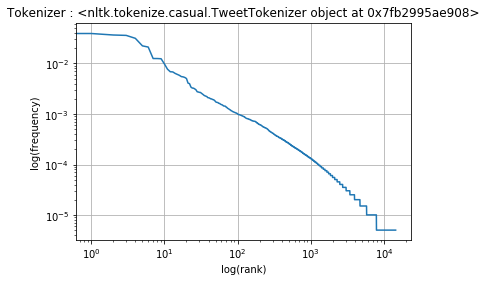

In [0]:
from collections import Counter
import matplotlib.pyplot as plt

for tok in tokenizers:
  arr = df.ab.drop_duplicates().apply(lambda x: tok.tokenize(x)).array
  arr = reduce(add, arr)
  # We use reduce to concatenate all the lists in arr, but we don't use "set" 
  # so that we can count occurencies with a Counter object 
  c = Counter(arr)
  print(c)
  # Formating the counter object to a proper dataset
  d = pd.DataFrame(c, index=['occurrences']).transpose().reset_index()
  d.columns=['word', 'occurences']
  # Computing frequencies instead of occurences
  nb_total = d.occurences.sum()
  d['freq'] = d.occurences.apply(lambda x: x/nb_total)
  # Sorting by frequency, most frequent word at the top of the df
  d = d.sort_values('freq', ascending=False)
  plt.figure()
  plt.grid()
  plt.xscale('log')  # Using log scale
  plt.yscale('log')  # Using log scale
  plt.xlabel('log(rank)')
  plt.ylabel('log(frequency)')
  plt.title("Tokenizer : {0}".format(tok))
  x = list(range(d.shape[0]))
  plt.plot(x, d.freq)
  plt.show()



# 3. Domain specificity and regex


## 3.1 Use regex to retrieve numbers (ints, floats, %, years, ...) in abstracts.


*Regex cheasheet* : see python's re module documentation https://docs.python.org/3/library/re.html  

*Other ressources* : 

- A good website to write and test regular expressions : 
https://regex101.com/
- A good game to learn regex : https://alf.nu/RegexGolf 


In [0]:
# See an example of a full abstract:
print(df.ab.iloc[0])

The ranges of plants and animals are moving in response to recent changes in climate. As temperatures rise, ecosystems with 'nowhere to go', such as mountains, are considered to be more threatened. However, species survival may depend as much on keeping pace with moving climates as the climate's ultimate persistence. Here we present a new index of the velocity of temperature change (km yr(-1)), derived from spatial gradients ( degrees C km(-1)) and multimodel ensemble forecasts of rates of temperature increase ( degrees C yr(-1)) in the twenty-first century. This index represents the instantaneous local velocity along Earth's surface needed to maintain constant temperatures, and has a global mean of 0.42 km yr(-1) (A1B emission scenario). Owing to topographic effects, the velocity of temperature change is lowest in mountainous biomes such as tropical and subtropical coniferous forests (0.08 km yr(-1)), temperate coniferous forest, and montane grasslands. Velocities are highest in flood

In [0]:
import re
# Regular expression that matches any sequence of numbers:
int_prog = re.compile('[0-9]+')
float_prog = re.compile('[0-9]+\.?[0-9]*')
percent_prog = re.compile('[0-9]+\.?[0-9]*%')
year_prog = re.compile('[12][089][0-9][0-9]') # a year between 1800 and 2099
df1 = df.drop_duplicates('ab')  # Don't forget to compute over unique abstracts
# Calculating number of matches for every abstract
progs = [int_prog, float_prog, percent_prog, year_prog]
nb_types = ['ints', 'floats', 'percents', 'years']
for prog, nb_type in zip(progs, nb_types):
  df1[nb_type] = df1['ab'].apply(lambda x: len(prog.split(x))-1).array
df1[nb_types].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


,ints,floats,percents,years
1,15,12,1,0
8,21,16,3,0
15,3,3,0,0
22,6,6,0,0
29,4,4,1,1


## 3.2 How many percent of characters are numbers (as defined above) in a given abstract?


In [0]:
nb_percent_types = [''.join([t, '%']) for t in nb_types]
# Don't forget to compute over unique abstracts
df1 = df.drop_duplicates('ab')

for prog, nb_type in zip(progs, nb_percent_types):
  df1[nb_type] = df1['ab'].apply(lambda x: 100 *(1 - len(''.join(prog.split(x)))/len(x))).array
df1[nb_percent_types+['ab']].head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ints%,floats%,percents%,years%,ab
1,1.207001,1.388051,0.120700,0.000000,The ranges of plants and animals are moving in...
8,1.854396,2.197802,0.618132,0.000000,With polar temperatures approximately 3-5 degr...
15,1.435407,1.435407,0.000000,0.000000,Global temperatures are known to have varied o...
22,1.547988,1.547988,0.000000,0.000000,Although the North American megafaunal extinct...
29,1.488834,1.488834,0.372208,0.496278,Armed conflict within nations has had disastro...


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb28698dda0>,
      dtype=object)

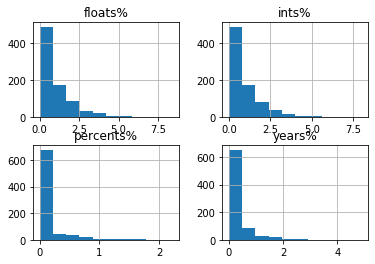

In [0]:
df1[nb_percent_types].hist()

## 3.3 Is there any relationship between the percentage of numbers in an abstract and the amount of citation?

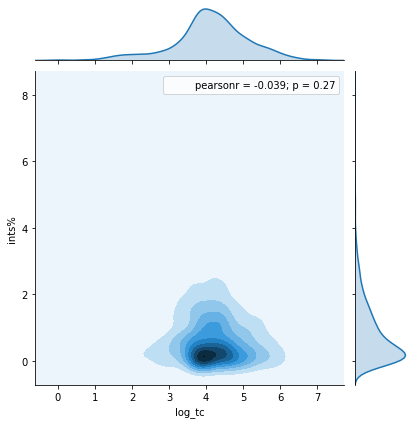

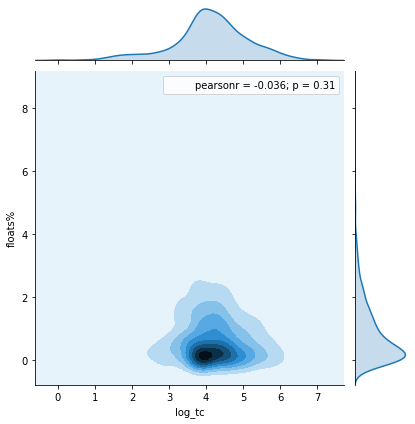

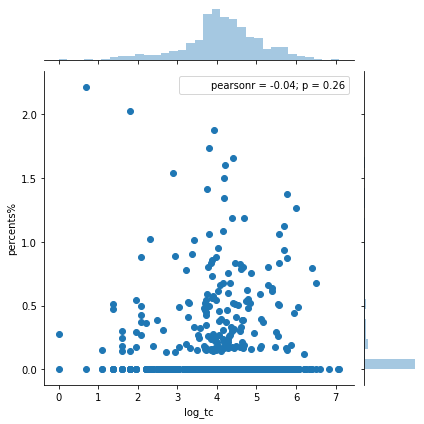

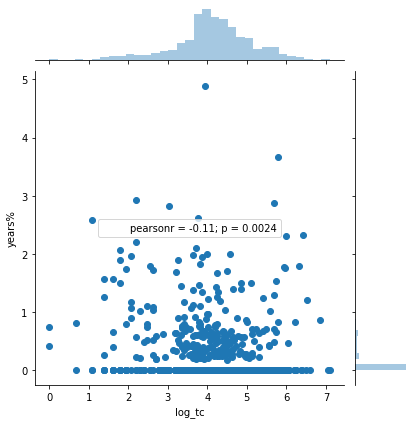

In [0]:
import seaborn as sns
import numpy as np
from scipy.stats import pearsonr, spearmanr
from warnings import filterwarnings
filterwarnings('ignore')

# Plotting the percentages against the corresponding log(citations)
df1['log_tc'] = np.log(df1['tc'].array)
for nb_type in nb_percent_types:
  # We will plot percents and years differently, as their scarcity creates a
  # matplotlib overflow when plotting a kde plot
  if nb_type in ['percents%', 'years%']:
    sns.jointplot(data=df1, x='log_tc', y=nb_type).annotate(pearsonr)
  else:
    sns.jointplot(data=df1, kind='kde', x='log_tc', y=nb_type).annotate(pearsonr)
    plt.show()
  


# 4. Classic NLP pipeline


#### 4.0 Re-tokenize using spacy

It is useful to take a look at spacy's [tokenizer documentation](https://spacy.io/usage/spacy-101#annotations-token)

In [0]:
from spacy.tokenizer import Tokenizer
from spacy.lang.en import English
nlp = English()

# Instanciating the tokenizer
tokenizer = Tokenizer(nlp.vocab)

# Repeating the earlier vocabulary count
arr = df.ab.drop_duplicates().apply(lambda x: [w.text for w in tokenizer(x)]).array
arr = reduce(add, arr)
print("Vocabulary size with Spacy's tokenizer: {}".format(len(set(arr))))

# Inspecting a tokenization sample
tokenization_sample = df.ab.drop_duplicates().head().apply(lambda x: 
                                              [w.text for w in tokenizer(x)])
print("Tokenization sample:\n {}".format(tokenization_sample))

Vocabulary size with Spacy's tokenizer: 20756
Tokenization sample:
 1     [The, ranges, of, plants, and, animals, are, m...
8     [With, polar, temperatures, approximately, 3-5...
15    [Global, temperatures, are, known, to, have, v...
22    [Although, the, North, American, megafaunal, e...
29    [Armed, conflict, within, nations, has, had, d...
Name: ab, dtype: object


The tokenizer doesn't seem to do better than nltk's tokenizers, in terms of vocabulary size.



## 4.1 Lemmatize using spacy

In [0]:
from spacy.lemmatizer import Lemmatizer
from spacy.lang.en import LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES
import spacy
nlp = spacy.load("en_core_web_sm")

# Instanciating lemmatizer
lemmatizer = Lemmatizer(LEMMA_INDEX, LEMMA_EXC, LEMMA_RULES)
# Usage: lemmatizer(token, POS(token))
# But we will rather use spacy's nlp engine

# Counting lemmas vocabulary count
arr = df.ab.drop_duplicates().apply(lambda x: [w.lemma_ for w in nlp(x)]).array
arr = reduce(add, arr)
print("Number of unique lemmas found with Spacy's lemmatizer: {}".format(len(set(arr))))

lemmatization_sample = df.ab.drop_duplicates().head().apply(lambda x: 
                                              [w.lemma_ for w in nlp(x)])
print("Lemmatization sample:\n {}".format(lemmatization_sample))

Number of unique lemmas found with Spacy's lemmatizer: 10462
Lemmatization sample:
 1     [the, range, of, plant, and, animal, be, move,...
8     [with, polar, temperature, approximately, 3, -...
15    [global, temperature, be, know, to, have, vary...
22    [although, the, north, american, megafaunal, e...
29    [armed, conflict, within, nation, have, have, ...
Name: ab, dtype: object




## 4.2 POS tagging using spacy, plot the trees

In [0]:
from spacy import displacy

# Inspecting a dependency tree and it's POS TAGs wth displacy
for ab in df.ab.drop_duplicates().head()[:2]:
  doc = nlp(ab)
  displacy.render(doc, style="dep", jupyter=True)



## 4.3 NER using spacy, give the amount of each entity type for a given abstract, and compare it to the amount of citations. 

In [0]:
# Visualizing Entities
for ab in df.ab.drop_duplicates().head()[:2]:
  doc = nlp(ab)
  displacy.render(doc, style="ent",jupyter=True)

In [0]:
# Getting the entity Information (takes about 40s)
short_df = df[['ab', 'tc']].drop_duplicates()
ab_ent = short_df['ab'].apply(lambda x: [ent.label_ for ent in nlp(x).ents]).array

# Displaying the available entity types
ent_types = set(np.concatenate(ab_ent))
print("Spacy recognizes {} entity types. "
"These types are the following:\n{}".format(len(ent_types), ent_types))


Spacy recognizes 18 entity types. These types are the following:
{'LAW', 'NORP', 'ORDINAL', 'LOC', 'TIME', 'EVENT', 'LANGUAGE', 'CARDINAL', 'WORK_OF_ART', 'PRODUCT', 'PERCENT', 'DATE', 'GPE', 'MONEY', 'PERSON', 'ORG', 'QUANTITY', 'FAC'}


In [0]:
# Getting counts for Every entity type
for ent_type in ent_types:
  ent_count = [sum([ab_ent_ij==ent_type for ab_ent_ij in ab_ent_i])
  for ab_ent_i in ab_ent]
  short_df[ent_type] = ent_count
short_df[ent_types].head()

,LAW,NORP,ORDINAL,LOC,TIME,EVENT,LANGUAGE,CARDINAL,WORK_OF_ART,PRODUCT,PERCENT,DATE,GPE,MONEY,PERSON,ORG,QUANTITY,FAC
1,0,0,0,2,0,0,0,0,0,1,1,3,0,0,0,0,3,0
8,0,0,0,0,0,0,0,5,0,0,3,3,0,0,0,0,2,0
15,0,0,0,2,0,0,0,0,0,0,0,2,0,0,1,2,0,0
22,0,1,0,0,0,0,0,1,0,0,0,2,3,0,2,1,0,0
29,0,1,1,1,0,0,0,1,0,0,1,2,0,0,0,0,0,0


In [0]:
# Displaying correlations for every entity type's presence with log(tc)
log_tc = np.log(short_df['tc'].array)
for ent_type in ent_types:
  ent_count = short_df[ent_type].array
  spr_corr, spr_p = spearmanr(log_tc, ent_count)
  pear_corr, pear_p = pearsonr(log_tc, ent_count)
  # We will only display ent_types that haven't been rejected (with Bonferroni's correction)
  if spr_p<0.05/18 and pear_p <0.05/18: 
    print("Regarding {}, the correlation could not be rejected :\n spearmanr: "
    "({}, {}), pearsonr: ({}, {})".format(ent_type, spr_corr, spr_p, pear_corr, pear_p))

Regarding CARDINAL, the correlation could not be rejected :
 spearmanr: (-0.1857760776916116, 1.1637837577962128e-07), pearsonr: (-0.13621815478310795, 0.0001089790717316319)
Regarding GPE, the correlation could not be rejected :
 spearmanr: (-0.23700487353088792, 1.057074194306966e-11), pearsonr: (-0.1558344169608617, 9.275970994185234e-06)
Regarding PERSON, the correlation could not be rejected :
 spearmanr: (-0.16136566818523898, 4.3730537725663865e-06), pearsonr: (-0.16124840625300163, 4.444500635012091e-06)
Regarding ORG, the correlation could not be rejected :
 spearmanr: (-0.19201245528955035, 4.2458596382389345e-08), pearsonr: (-0.12401802948281859, 0.00043112063221038604)



# 5. Topic Modelling


## 5.1 Use Gensim's LDA to compute a topic model. 


In [0]:
from gensim.models import LdaModel
from gensim import corpora
import nltk
from string import punctuation

nltk.download('stopwords')
en_stop = set(nltk.corpus.stopwords.words('english'))
to_be_removed = list(en_stop) + list(punctuation)

tok = TreebankWordTokenizer()
# Tokenizing + removing stopwords
text_data = list(df.ab.drop_duplicates().apply(lambda x: list(filter(lambda a: a.lower() not in to_be_removed,tok.tokenize(x)))).array)
print(text_data[0])
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

ldamodel = LdaModel(corpus, id2word=dictionary, num_topics=4)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['ranges', 'plants', 'animals', 'moving', 'response', 'recent', 'changes', 'climate.', 'temperatures', 'rise', 'ecosystems', "'nowhere", 'go', 'mountains', 'considered', 'threatened.', 'However', 'species', 'survival', 'may', 'depend', 'much', 'keeping', 'pace', 'moving', 'climates', 'climate', "'s", 'ultimate', 'persistence.', 'present', 'new', 'index', 'velocity', 'temperature', 'change', 'km', 'yr', '-1', 'derived', 'spatial', 'gradients', 'degrees', 'C', 'km', '-1', 'multimodel', 'ensemble', 'forecasts', 'rates', 'temperature', 'increase', 'degrees', 'C', 'yr', '-1', 'twenty-first', 'century.', 'index', 'represents', 'instantaneous', 'local', 'velocity', 'along', 'Earth', "'s", 'surface', 'needed', 'maintain', 'constant', 'temperatures', 'global', 'mean', '0.42', 'km', 'yr', '-1', 'A1B', 'emission', 'scenario', 'Owing', 'topographic', 'effects', 'velocity', 'temper

/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for id, cnt in doc)
/usr/local/lib/python3.6/dist-packages/gensim/models/ldamodel.py:1077: DeprecationWarning: Calling np.sum(generator) is deprecated, and in the future will give a different result. Use np.sum(np.fromiter(generator)) or the python sum builtin instead.
  score += np.sum(cnt * logsumexp(Elogthetad + Elogbeta[:, int(id)]) for

## 5.2 Use PyLDAvis to visualise the topic model. What are the different topic clusters?


In [0]:
!pip install pyLDAvis


In [0]:
import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary)
pyLDAvis.display(lda_display)

Topic modelling not very relevant here.